# Visualização dos Dados

As visualizações vão ser construídas de duas formas. Primeiro será utilizada a biblioteca *Plotly* para ter uma primeira visão sobre os dados processados na etapa anterior e permitir as primeiras análises. O entendimento dessas informações será utilizada para construir a versão final da visualização utilizando o D3.js. Os códigos e a visualização final estarão linkadas no final desse notebook. 

## Imports Necessários

In [1]:
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np 


## Primeira análise: Percentual de mulheres candidatas x Percentual de mulheres eleitas

Nessa análise queremos comparar o % de mulheres candidatas (ou seja, a proporção de pessoas que se declararam do gênero feminino) comparado com a % de homens. Com o foco de dar visibilidade as % das mulheres, somente esses valores serão visualizados. A % de homens é o complemento. 

In [2]:
## Carregando os Dados


data1 = pd.read_csv("../output/total_vereadores_por_ano_genero.csv") # % das pessoas candidatas
data2 = pd.read_csv("../output/total_vereadores_eleitos_por_ano_genero.csv") # % das pessoas eleitas

In [3]:
data1['ano'] = data1['ano'].astype('str')

### Visualização

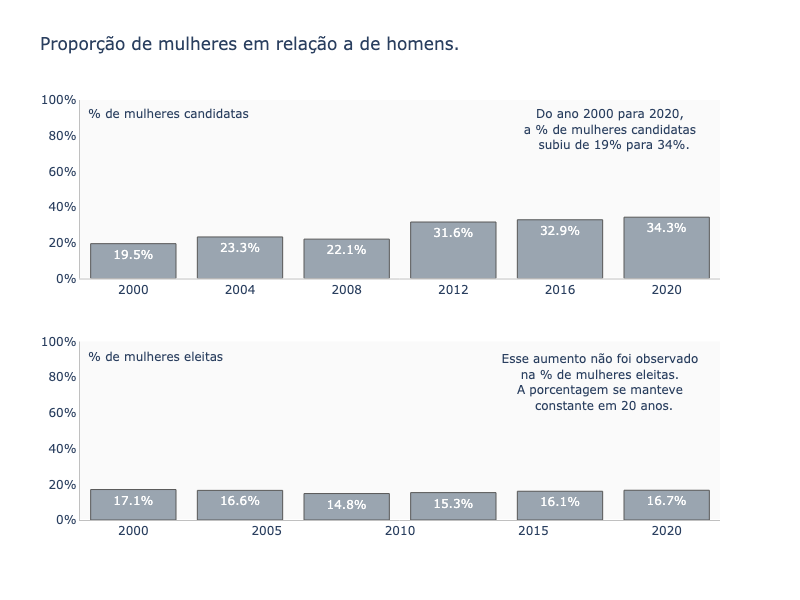

In [5]:
# Filtrando os dados do gênero feminino
data_selected1 = data1.query("genero == 'feminino'") 
data_selected2 = data2.query("genero == 'feminino'")

# Construindo a visualização

fig = go.Figure()

fig = make_subplots(
    rows=2, cols=1,
    row_heights=[0.5,0.5],
)


fig.add_trace(go.Bar(
            x=data_selected1.ano, 
            y=data_selected1.porcentagem, 
            text=data_selected1.porcentagem,
            texttemplate='%{y:.1%}',
            hovertemplate='Ano: %{x} <br /> %: %{y:.1%}',
            opacity=0.8,
            
        ), row=1, col=1)

fig.add_trace(go.Bar(
            x=data_selected2.ano, 
            y=data_selected2.porcentagem, 
            text=data_selected2.porcentagem,
            texttemplate='%{y:.1%}',
            hovertemplate='Ano: %{x} <br /> %: %{y:.1%}',
            opacity=0.8,
        ), row=2, col=1)

fig.update_layout(title="Proporção de mulheres em relação a de homens.",
                  plot_bgcolor="#FAFAFA",
                  showlegend=False,
                  width=800,
                  height=600,
                  
                  )

fig.update_traces(marker_color='#708090', marker_line_color='#121212',
                  marker_line_width=1, opacity=0.7)


fig.layout.yaxis1.tickformat=',.0%'
fig.layout.yaxis1.range=[0,1]
fig.layout.yaxis2.tickformat=',.0%'
fig.layout.yaxis2.range=[0,1]

fig.add_annotation(x=0.01, y=0.99,
            text="% de mulheres candidatas",
            showarrow=False,
            xref='paper',
            yref='paper',
            )

fig.add_annotation(x=0.01, y=0.39,
            text="% de mulheres eleitas",
            showarrow=False,
            xref='paper',
            yref='paper',
            )

fig.add_annotation(x=0.99, y=0.99,
            text="Do ano 2000 para 2020, <br />a % de mulheres candidatas <br /> subiu de 19% para 34%.",
            showarrow=False,
            xref='paper',
            yref='paper',
            width=200,
            xanchor="right"
            )

fig.add_annotation(x=0.99, y=0.25,
            text="Esse aumento não foi observado <br />na % de mulheres eleitas. <br />A porcentagem se manteve <br /> constante em 20 anos.",
            showarrow=False,
            xref='paper',
            yref='paper',
            width=220,
            xanchor="right"
            )

fig.update_yaxes( 
  showgrid=False,
  linecolor="#C0C0C0",
  linewidth=1
)

fig.update_xaxes(  
  showgrid=False,
  linecolor="#C0C0C0",
  linewidth=1
)

fig.show("png")


## Segunda Análise: Recorte de Raça 

Uma segunda análise a ser verificada é como esses números de candidaturas e eleições de mulheres estão distribuídas em relação a cor/raça. Com o objetivo é ver a distribução no grupo de mulheres, a % calculada se refere somente a esse grupo. 

In [6]:
data3 = pd.read_csv("../output/total_vereadores_por_ano_genero_raca.csv") # % das pessoas candidatas
data4 = pd.read_csv("../output/total_vereadores_eleitos_por_ano_genero_raca.csv") # % das pessoas eleitas

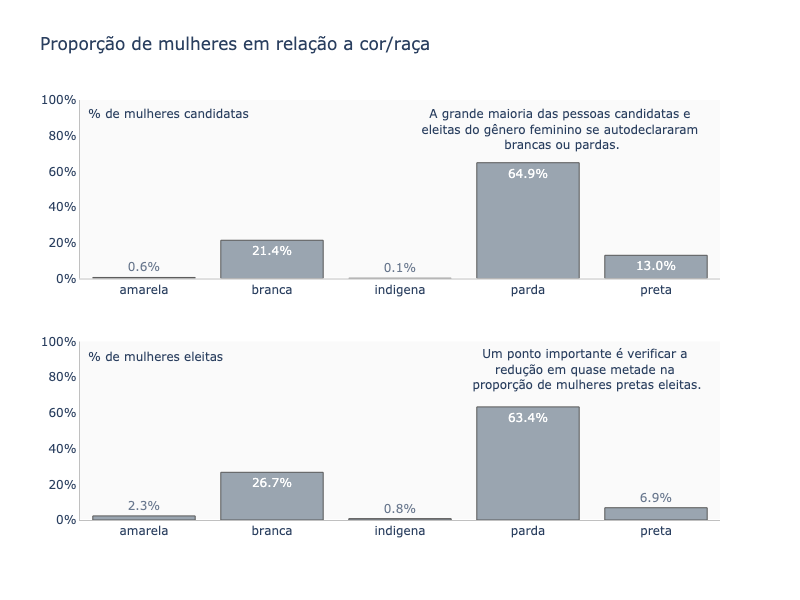

In [14]:
data_selected3 = data3.query("ano == 2020") # Foi filtrado só o ano de 2020
data_selected4 = data4.query("ano == 2020") # Foi filtrado só o ano de 2020

# Construindo a visualização

fig = go.Figure()

fig = make_subplots(
    rows=2, cols=1,
    row_heights=[0.5,0.5],
)


fig.add_trace(go.Bar(
            x=data_selected3.raca, 
            y=data_selected3.porcentagem, 
            text=data_selected3.porcentagem,
            texttemplate='%{y:.1%}',
            hovertemplate='Ano: %{x} <br /> %: %{y:.1%}',
            opacity=0.8,
            
        ), row=1, col=1)

fig.add_trace(go.Bar(
            x=data_selected4.raca, 
            y=data_selected4.porcentagem, 
            text=data_selected4.porcentagem,
            texttemplate='%{y:.1%}',
            hovertemplate='Ano: %{x} <br /> %: %{y:.1%}',
            opacity=0.8,
        ), row=2, col=1)

fig.update_layout(title="Proporção de mulheres em relação a cor/raça",
                  plot_bgcolor="#FAFAFA",
                  showlegend=False,
                  width=800,
                  height=600,
                  
                  )

fig.update_traces(marker_color='#708090', marker_line_color='#121212',
                  marker_line_width=1, opacity=0.7)


fig.layout.yaxis1.tickformat=',.0%'
fig.layout.yaxis1.range=[0,1]
fig.layout.yaxis2.tickformat=',.0%'
fig.layout.yaxis2.range=[0,1]

fig.add_annotation(x=0.01, y=0.99,
            text="% de mulheres candidatas",
            showarrow=False,
            xref='paper',
            yref='paper',
            )

fig.add_annotation(x=0.01, y=0.39,
            text="% de mulheres eleitas",
            showarrow=False,
            xref='paper',
            yref='paper',
            )

fig.add_annotation(x=0.99, y=0.99,
            text="A grande maioria das pessoas candidatas e <br />eleitas do gênero feminino se autodeclararam <br />brancas ou pardas.",
            showarrow=False,
            xref='paper',
            yref='paper',
            width=300,
            xanchor="right"
            )

fig.add_annotation(x=0.99, y=0.30,
            text="Um ponto importante é verificar a <br />redução em quase metade na <br />proporção de mulheres pretas eleitas.",
            showarrow=False,
            xref='paper',
            yref='paper',
            width=250,
            xanchor="right"
            )

fig.update_yaxes( 
  showgrid=False,
  linecolor="#C0C0C0",
  linewidth=1
)

fig.update_xaxes(  
  showgrid=False,
  linecolor="#C0C0C0",
  linewidth=1
)

fig.show("png")


## Terceira Análise: um recorte de Aracaju

Para visualizar um pouco mais essas proporções, utilizei Aracaju (a capital do estado) para um olhar mais detalhado da proporção de mulheres eleitas ao longo dos anos e posição que elas ocupam de acordo com o número de votos. 

In [8]:
data5 = pd.read_csv("../output/lista_vereadores_eleitos_aracaju_por_ano.csv") # dados de Aracaju
data5

,ano,sigla_uf,id_municipio,nome_municipio,tipo_eleicao,id_candidato_bd,nome_urna,sigla_partido,cargo,situacao,resultado,votos,genero,raca,idade
0,2000,SE,2800308,Aracaju,eleicao ordinaria,829690,Barreto,PPS,vereador,deferido,eleito,4947,masculino,NaN,36.0
1,2000,SE,2800308,Aracaju,eleicao ordinaria,722885,Chiquinho,PT,vereador,deferido,eleito,4729,masculino,NaN,44.0
2,2000,SE,2800308,Aracaju,eleicao ordinaria,723744,Sérgio Carlos,PSDB,vereador,deferido,eleito,4046,masculino,NaN,42.0
3,2000,SE,2800308,Aracaju,eleicao ordinaria,658924,Bomfim,PPS,vereador,deferido,eleito por media,3300,masculino,NaN,56.0
4,2000,SE,2800308,Aracaju,eleicao ordinaria,626985,Carlos Magal,PT,vereador,deferido,eleito,3168,masculino,NaN,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2020,SE,2800308,Aracaju,eleicao ordinaria,694328,Professora Ângela Melo,PT,vereador,deferido,eleito por qp,1882,feminino,amarela,64.0
127,2020,SE,2800308,Aracaju,eleicao ordinaria,1591,Sgt. Byron Estrelas Do Mar,REPUBLICANOS,vereador,deferido,eleito por media,1743,masculino,parda,42.0
128,2020,SE,2800308,Aracaju,eleicao ordinaria,774078,Paquito De Todos,SOLIDARIEDADE,vereador,deferido,eleito por media,1486,masculino,branca,59.0
129,2020,SE,2800308,Aracaju,eleicao ordinaria,1038140,Cícero Do Santa Maria,PODE,vereador,deferido,eleito por media,1470,masculino,branca,57.0


In [9]:
%%capture --no-display
data_filter = data5[['ano','genero','votos']]
data_filter.loc[:, 'posicao'] = data_filter.groupby(by=['ano']).votos.transform(lambda x : pd.factorize(x)[0]+1)
data_filter.loc[data_filter['genero'] == 'masculino', 'genero_int'] = 0
data_filter.loc[data_filter['genero'] == 'feminino', 'genero_int'] = 1
data_filter

,ano,genero,votos,posicao,genero_int
0,2000,masculino,4947,1,0.0
1,2000,masculino,4729,2,0.0
2,2000,masculino,4046,3,0.0
3,2000,masculino,3300,4,0.0
4,2000,masculino,3168,5,0.0
...,...,...,...,...,...
126,2020,feminino,1882,20,1.0
127,2020,masculino,1743,21,0.0
128,2020,masculino,1486,22,0.0
129,2020,masculino,1470,23,0.0


Podemos enxergar os dados acima de uma outra forma. Observe a tabela a seguir. É possível perceber que ao longo de 20 anos foram poucas as vezes que as mulheres ocuparam as primeiras posições nas votações para a câmara municipal de Aracaju. Na tabela, a coluna representa as posições e os quadrados destacados candidaturas de pessoas do gênero feminino.

In [13]:
pd.set_option('display.max_columns', None)
data_pivoted = pd.pivot_table(data_filter, values=['genero_int'], index=['ano'], columns=['posicao'])

from IPython.display import display, HTML
display(HTML(
(data_pivoted.style
    .format('', na_rep='')
     .highlight_max(color='lightblue', axis=1).render()
)))

/var/folders/4j/2xtw3gvs2sv08trg9zyn33cc0000gn/T/ipykernel_96461/1638979233.py:6: FutureWarning:

this method is deprecated in favour of `Styler.to_html()`



### Quarta Análise: Detalhes por município

Na última análise destes dados, o foco será olhar com mais detalhes como essa proporção de mulheres eleitas se comporta nos 75 munícipios. Como são muitos municípios, o foco vai ser olhar uma visão mais geral para tirar algumas informações importantes. 

In [11]:
data6 = pd.read_csv("../output/total_vereadores_por_ano_municipio_genero.csv")
data6

,ano,id_municipio,nome_municipio,genero,total_por_genero,total,porcentagem
0,2000,2800100,Amparo de São Francisco,feminino,3,9.0,0.333333
1,2000,2800100,Amparo de São Francisco,masculino,6,9.0,0.666667
2,2000,2800209,Aquidabã,feminino,1,11.0,0.090909
3,2000,2800209,Aquidabã,masculino,10,11.0,0.909091
4,2000,2800308,Aracaju,feminino,3,21.0,0.142857
...,...,...,...,...,...,...,...
816,2020,2807402,Tobias Barreto,masculino,12,14.0,0.857143
817,2020,2807501,Tomar do Geru,feminino,3,9.0,0.333333
818,2020,2807501,Tomar do Geru,masculino,6,9.0,0.666667
819,2020,2807600,Umbaúba,feminino,1,11.0,0.090909


In [12]:
data6_filter = data6.query("genero == 'feminino'")
data6_filter

,ano,id_municipio,nome_municipio,genero,total_por_genero,total,porcentagem
0,2000,2800100,Amparo de São Francisco,feminino,3,9.0,0.333333
2,2000,2800209,Aquidabã,feminino,1,11.0,0.090909
4,2000,2800308,Aracaju,feminino,3,21.0,0.142857
6,2000,2800407,Arauá,feminino,2,10.0,0.200000
8,2000,2800506,Areia Branca,feminino,1,11.0,0.090909
...,...,...,...,...,...,...,...
811,2020,2807204,Siriri,feminino,1,9.0,0.111111
813,2020,2807303,Telha,feminino,3,9.0,0.333333
815,2020,2807402,Tobias Barreto,feminino,2,14.0,0.142857
817,2020,2807501,Tomar do Geru,feminino,3,9.0,0.333333
